In [34]:
import networkx as nx
from icecream import ic

## Create graph (bish2022, fig. 7)

In [20]:
G = nx.Graph()

In [21]:
edges = [(1,2), (1,3), (1,4), 
        (2,3), (2,4),
        (3,4), (3,5),
        (5,6),
        (6,7), (6,8),
        (7,8)]
G.add_edges_from(edges)

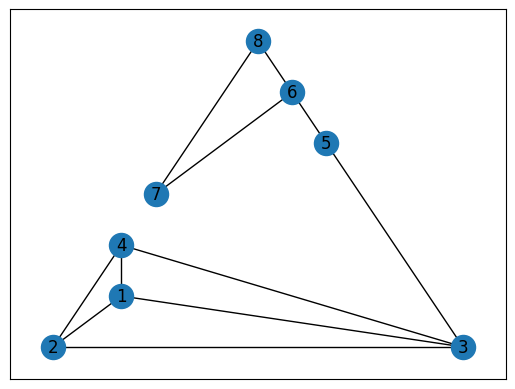

In [23]:
labels = {node: node for node in G.nodes}

pos = nx.planar_layout(G)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G,pos )
nx.draw_networkx_labels(G, pos, labels=labels);

## Find articulation points 

In [29]:
cut_vertices = list(nx.articulation_points(G))
cut_vertices

[6, 5, 3]

## Algo 1

In [39]:
blocks = list(nx.biconnected_components(G))
blocks

[{6, 7, 8}, {5, 6}, {3, 5}, {1, 2, 3, 4}]

In [72]:
def check_block(node, blocks):
    indices = []
    set_members = []
    for index, my_set in enumerate(blocks):
        if node in my_set:
            indices.append(index)
            set_members.append(my_set)
            # print(f"The integer {node} belongs to the set at index {index}")
            # break
    # else:
    #     pass
    #     print(f"The integer {node} is not present in any set.")
    # ic(indices)
    # set_members = set().union(*set_members)
    return indices, set_members

In [65]:
k = [{5, 6}, {3, 5}]
set().union(*k)

{3, 5, 6}

In [73]:
check_block(5, blocks)

([1, 2], [{5, 6}, {3, 5}])

In [74]:
def biconnect(G, cut_vertices):
    for v in cut_vertices:
        # find vertices adjacent to x (ie neighbours of x?)
        neighbors = list(G.neighbors(v))
        blocks = list(nx.biconnected_components(G))
        ic("\n", v, neighbors)
        for curr_item, next_item in zip(neighbors, neighbors[1:]):
            curr_block, curr_block_members = check_block(curr_item, blocks)
            next_block, next_block_members = check_block(next_item, blocks)
            ic(curr_item, curr_block_members)
            ic(next_item, next_block_members)
            if not set(curr_block) & set(next_block):
                ic("No overlap")





In [61]:
blocks

[{6, 7, 8}, {5, 6}, {3, 5}, {1, 2, 3, 4}]

In [75]:
biconnect(G, cut_vertices)

ic| "\n": '
           '
    v: 6
    neighbors: [5, 7, 8]
ic| curr_item: 5, curr_block_members: [{5, 6}, {3, 5}]
ic| next_item: 7, next_block_members: [{8, 6, 7}]
ic| 'No overlap'
ic| curr_item: 7, curr_block_members: [{8, 6, 7}]
ic| next_item: 8, next_block_members: [{8, 6, 7}]
ic| "\n": '
           '
    v: 5
    neighbors: [3, 6]
ic| curr_item: 3, curr_block_members: [{3, 5}, {1, 2, 3, 4}]
ic| next_item: 6, next_block_members: [{8, 6, 7}, {5, 6}]
ic| 'No overlap'
ic| "\n": '
           '
    v: 3
    neighbors: [1, 2, 4, 5]
ic| curr_item: 1, curr_block_members: [{1, 2, 3, 4}]
ic| next_item: 2, next_block_members: [{1, 2, 3, 4}]
ic| curr_item: 2, curr_block_members: [{1, 2, 3, 4}]
ic| next_item: 4, next_block_members: [{1, 2, 3, 4}]
ic| curr_item: 4, curr_block_members: [{1, 2, 3, 4}]
ic| next_item: 5, next_block_members: [{5, 6}, {3, 5}]
ic| 'No overlap'
